In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/panda/

/content/drive/My Drive/panda


#**Reading a Excel file**

In [ ]:
df = pd.read_excel("stock_data.xlsx","Sheet1")
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


#**Using converters**
### 1.  Defining function "convert_people_cell" --> convert the cell having n.a by Sam Walton in people column

### 2.     Defining function "convert_price_cell" ----> convert the cell having n.a by 50 in price column







In [ ]:
def convert_people_cell(cell):
    if cell=="n.a.":
        return 'Sam Walton'
    return cell

def convert_price_cell(cell):
    if cell=="n.a.":
        return 50
    return cell

df = pd.read_excel("stock_data.xlsx","Sheet1", converters= {
        'people': convert_people_cell,
        'price': convert_price_cell
    })
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Sam Walton
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,50,ratan tata


#**Write to a Excel file**

In [ ]:
df.to_excel("new.xlsx", sheet_name="stocks")

#output:
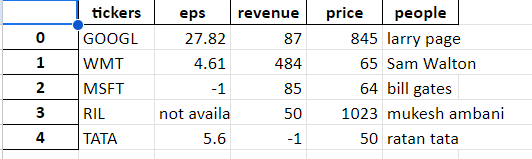

### 1.   using index =false to remove the index
### 2.   Using startrow=n to write in a excel file starting from the nth row (index starts from 0)
### 3.   Using startcol=n1 to write in a excel file starting from the n1th column (index starts from 0)





In [ ]:
df.to_excel("new.xlsx", sheet_name="stocks", index=False, startrow=2, startcol=1)

#output:
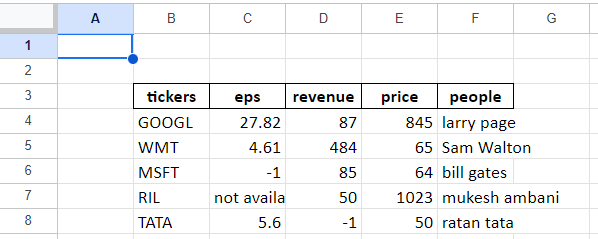

#**Write two dataframes to two separate sheets in excel**

In [ ]:
# creating two dataframes using dictionary
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845, 65, 64 ],
    'pe': [30.37, 14.26, 30.97],
    'eps': [27.82, 4.61, 2.12]
})

df_weather =  pd.DataFrame({
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})

#**using ExcelWriter to Write two dataframes to two separate sheets in excel**

In [ ]:
with pd.ExcelWriter('stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name="stocks")
    df_weather.to_excel(writer, sheet_name="weather")